In [1]:
import random
def random_pick(some_list, probabilities):
	x = random.uniform(0, 1)
	cumulative_probability = 0.0
	for item, item_probability in zip(some_list, probabilities):
		cumulative_probability += item_probability
		if x < cumulative_probability:break
	return item

In [2]:
import numpy as np
random_list = np.random.random_sample((10,))
print(random_list)

[0.87044827 0.11977692 0.30197564 0.19566984 0.6643285  0.50784691
 0.34798836 0.12310219 0.69146168 0.0766216 ]


In [3]:
sum(random_list)

3.899219927426193

In [4]:
print(np.random.dirichlet(np.ones(10),size=1))

[[0.16493117 0.01101613 0.11631577 0.05349168 0.15938006 0.23228205
  0.01929891 0.0180168  0.11396555 0.11130187]]


In [5]:
p = np.random.dirichlet(np.ones(10),size=1)[0]
print(p)
print(sum(p))

[0.06017025 0.00197908 0.10837913 0.21225383 0.07983389 0.00603541
 0.22918056 0.2640336  0.01804646 0.02008778]
1.0


In [6]:
print(np.ones(10))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
p = np.random.dirichlet(np.ones(10),size=1)[0]
print(p)
print(sum(p))

[0.23400885 0.02308732 0.10131466 0.17953254 0.18132822 0.00323022
 0.06222081 0.08559741 0.04570752 0.08397243]
1.0000000000000004


In [8]:
print(random_pick(random_list, p))

0.3479883577532207


In [9]:
p0 = np.random.dirichlet(np.ones(10),size=2)[0]
print(sum(p0))

1.0000000000000002


In [10]:
print(p0)

[0.10369296 0.0126651  0.29287996 0.04496252 0.04490806 0.00953378
 0.17632482 0.03636332 0.26748625 0.01118322]


In [11]:
print(random_pick(p0, p))

0.04496252356315556


In [12]:
# a = array of items from which to choose
# n = number to choose
# p = probabilities associated with each entry in a
def random_choice(a, n, p):
    t= 0
    choice = np.random.choice(a, n, p=p, replace=False)
    return choice

In [13]:
l = int(len(p)/2)
print(random_choice(p0, l, p))


[0.04496252 0.10369296 0.26748625 0.04490806 0.29287996]


In [14]:
def spin(a, t):
    # print(a)
    # print(n)
    # print(sum(a))
    if sum(a) >= t:
        # print(1)
        return (1, sum(a))
    else:
        # print(0)
        return (0, sum(a))   

In [15]:
spin(p0, .5)

(1, 1.0000000000000002)

In [16]:
l = int(len(p)/2)
spin(random_choice(p0, l, p), .5)

(0, 0.24111009067655742)

In [17]:
# Scenario 1.
# a is an array of 10 random values between 0 > a < 1 (should sum to almost 1)
# p is an array of 10 random values between 0 > p < 1 (should sum to almost 1) 
# Make random choice by probabilities=p, but selecting only 5 from a
## If the sum of choices for each round is above threshold t, x is incremented by 1
# a --> array (items or actualities)
# p --> probabilities (preferences attached to an item)
# t --> threshold of correct choice (whether the choice is a desired item)
# l --> num of iterations (length of run)
# below n == size a / 2


def spin_loop(a, p, t, l, randomize=False):
    n = int(len(p)/2)
    x = 0
    i = 0
    r = []
    s = 0
    while x < l:
        if randomize:
            a = np.random.dirichlet(np.ones(10),size=2)[0]
            p= np.random.dirichlet(np.ones(10),size=2)[0]
        local =  spin(random_choice(a, n, p), t)
        i += local[0]
        r.append(local[1])
        s += local[0]*n/len(a)
        x += 1
    # print('actuals: ' + str(i))
    # print('choice: ' + str(r))
    # print('ratio actuals/choice: ' + str(i/r))
    return (r, i, s, s/l)

In [18]:
print(spin_loop(p0, p, .439, 1000))

([0.686600121450512, 0.4976267243712645, 0.40625168698249875, 0.46368827885567787, 0.6627683206772058, 0.6627683206772058, 0.49762672437126454, 0.6289890185050153, 0.8852920490624775, 0.49910860549933755, 0.536320138836912, 0.45678456379529786, 0.24111009067655742, 0.7539297549287267, 0.2088671294262887, 0.6627683206772057, 0.49762672437126454, 0.7116057132246869, 0.37252684460415697, 0.5228068272177571, 0.5954386871989912, 0.6627683206772058, 0.6036497723151266, 0.7201504527565362, 0.4974131212340196, 0.4905638659674883, 0.24111009067655742, 0.6287754153677705, 0.5228068272177571, 0.49762672437126454, 0.472233018387527, 0.522806827217757, 0.4976267243712645, 0.6541691213515078, 0.4976267243712645, 0.3810715841360062, 0.522806827217757, 0.24259197180463046, 0.6288298751616191, 0.4873780828815077, 0.6289890185050153, 0.49056386596748836, 0.5228068272177571, 0.43029709089304985, 0.7202049125503849, 0.4976267243712645, 0.4976267243712645, 0.2174118689581379, 0.38107158413600617, 0.3810715

In [19]:
# a --> array a <-- random_choice(a, n, p) [a, p <-- np.random.dirichlet(np.ones(10),size=1)[0], n <-- int(len(p)/2)]
# i --> each element of array a (the five mapped items)
# This expresses the correct choice reward
# the intuition is that the five returned items should sum to .5
# So if i > .1 we have a win.
# Since the results in a are already randomised we return the first item in a, with whether it is a win or not.
# for each i in a
# if i >= threshold/five
def choose(a, t):
    r = 0
    for i in a:
        r = 0
        if i >= t: #t/len(a):
            r += 1
    r = r/len(a)
    return (sum(a)/len(a), r)

In [20]:
# Scenario 2.
# a is an array of 10 random values between 0 > a < 1 (should sum to almost 1)
# p is an array of 10 random values between 0 > p < 1 (should sum to almost 1) 
# Make random choice by probabilities=p, but selecting only 5 from a
# Here, instead of where the sum of choices for each round is above threshold t, x is incremented by 1, 
# there is the notion of reward for a choice above a threshold. For instance if the threshold is .5 as 
# there are ten items, on average each item must equal .1 .
# In this case, if the item being chosen is above .1 then 1 is added to the score.
# In 1000 runs the total score might equal just short of 1000
# a --> array
# p --> probabilities
# t --> threshold of correct choice
# l --> num of iterations (length of run)
# below n == size a / 2


def choose_loop(a, p, t, l):
    # len(a) = 10
    n = int(len(p)/2) # 5
    x = 0
    i = 0
    r = []
    s = 0 
    while x < l:
        local = choose(random_choice(a, n, p), t/len(a))
        i += local[0]
        r.append(local[1])
        s += local[1]*n/len(a)
        x += 1
    # print('actuals: ' + str(i))
    # print('choice: ' + str(s))
    #  actuals choice ratio
    return (r, i, s, s/l)

In [21]:
print(choose_loop(p0, p, .3, 1000)[0:])

([0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.2

In [22]:
print(choose_loop(p0, p, .02, 1000)[0])

[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,

In [23]:
# Close to correct with 50/50 estimate
print(spin_loop(p0, p, .5, 1000))

([0.6627683206772058, 0.34882862288573746, 0.654169121351508, 0.5228068272177571, 0.6542235811453566, 0.5228068272177571, 0.6290434782988641, 0.5631957259487225, 0.2088671294262887, 0.24111009067655742, 0.49762672437126454, 0.4399900571372583, 0.4991086054993375, 0.49762672437126454, 0.5954386871989912, 0.2088671294262887, 0.5348298400162492, 0.6289890185050153, 0.4636338190618291, 0.4890819848394153, 0.6627683206772058, 0.6035953125212778, 0.6627683206772058, 0.6288298751616191, 0.2174118689581379, 0.4976267243712645, 0.4905094061736396, 0.5228068272177571, 0.3810715841360062, 0.4976267243712645, 0.4636338190618291, 0.8265616149099607, 0.49910860549933755, 0.4062516869824988, 0.5616593850268007, 0.4974131212340196, 0.5448648783687612, 0.6543571602002434, 0.4890819848394153, 0.472233018387527, 0.2174118689581379, 0.2088671294262887, 0.4974131212340196, 0.8265616149099607, 0.8853465088563263, 0.5228068272177571, 0.40625168698249875, 0.3810715841360062, 0.49741312123401954, 0.72163233388

In [24]:
# v = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #np.ones(10)
#  v == p required
v = p
l = int(len(v)/2)
print(random_choice(p0, l, v))

[0.10369296 0.29287996 0.17632482 0.04490806 0.26748625]


In [25]:
np.arange(0,.99999,.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [26]:
count = 9
v0 = np.ones(count)
v = []
for x in v0:
    v.append(x/20)
m = 1 - sum(v)
loop = 0
while loop < (10 - count):
    v.append(m/(10 - count))
    loop += 1
print(v)
print(sum(v))

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.55]
1.0


From **Probabilistic Programming and Bayesian Methods for Hackers** _Bayesian Methods for Hackers_ [Chapter1_Introduction](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC2.ipynb)
*Cameron Davidson-Pilon*

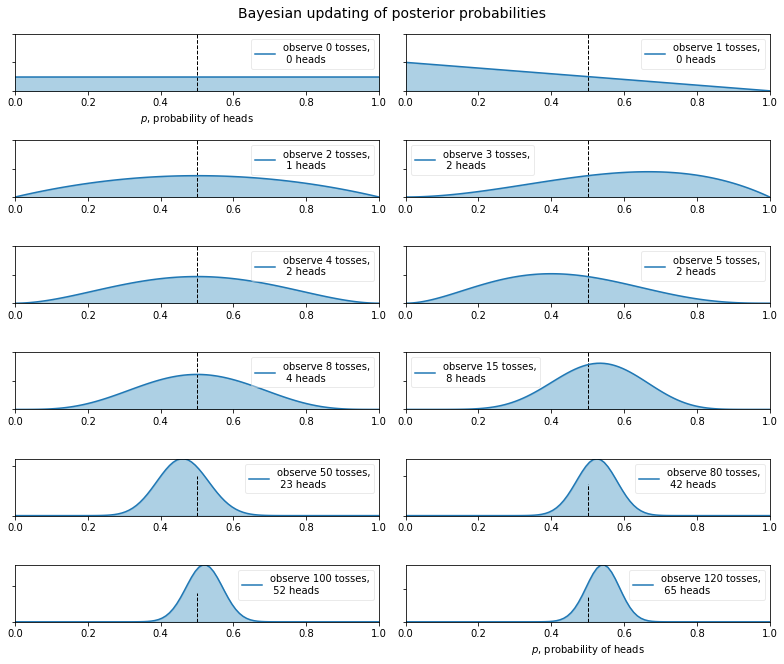

In [28]:
# coin toss
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 80, 100, 120]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

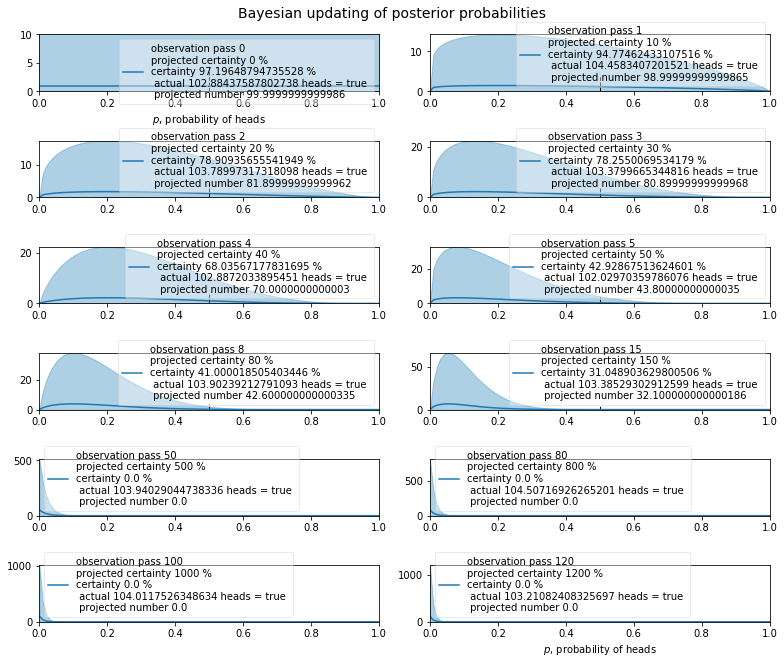

In [30]:
# choose_loop
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 80, 100, 120]
# n_trials = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#n_trials = [0, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 
            # 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 
            # 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]

x = np.linspace(0, 1, 100)

# 
for k, N in enumerate(n_trials):
    # set up the data //  N/50
    result = choose_loop(p0, p, N/10, 1000)
    data = np.array(result[0])
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=True)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observation pass {0}\nprojected certainty {1} % \ncertainty {2} % \n actual {3} heads = true \n "
                         "projected number {4}".format(N, N*10, result[2]/result[1]*100, result[1], result[2])) #data[:].sum()))
    plt.fill_between(x, 0, y*10, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

In [42]:
# n_trials = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]# integers OK
n_trials = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]
for k, N in enumerate(n_trials):
    print(choose_loop(p0, p, N/5, 1000)[1])
    print(choose_loop(p0, p, N/5, 1000)[2])
    print(np.array(choose_loop(p0, p, N/5, 1000)[0]).sum())
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    print(y)
    print(k)
# x = np.array([2, 3, 1, 0])

103.28867876915768
99.9999999999986


200.00000000000003
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
0
103.80616260076307


99.9999999999986
200.00000000000003


TypeError: slice indices must be integers or None or have an __index__ method

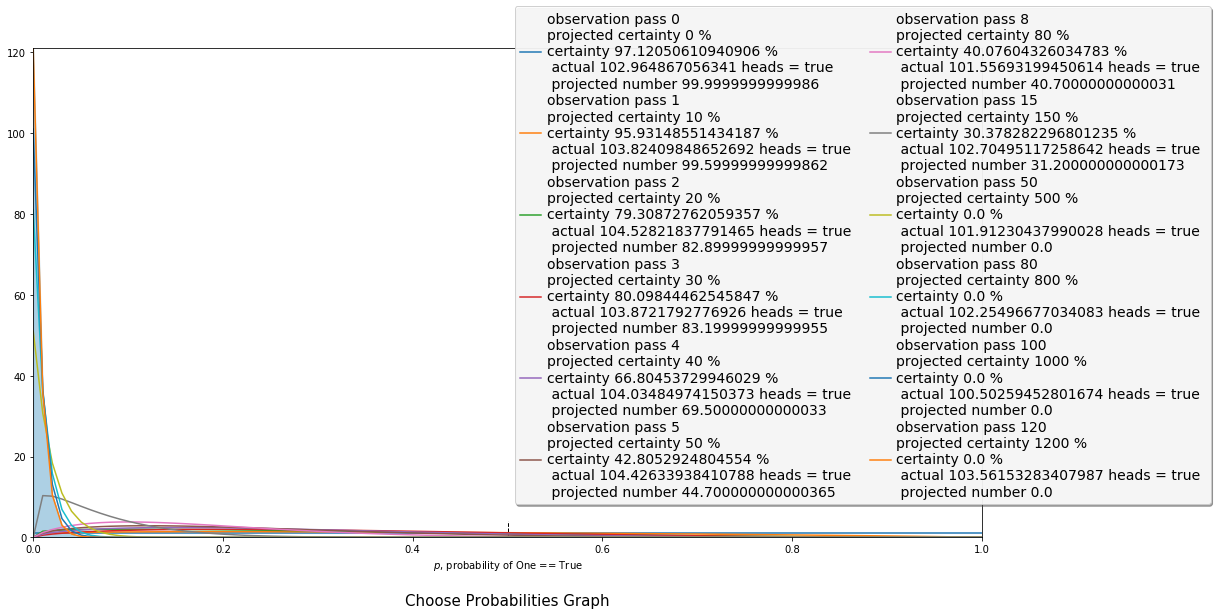

In [32]:
# choose_loop
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(17, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 80, 100, 120]
# n_trials = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

x = np.linspace(0, 1, 100)

# 
    # set up the data
# sx = plt.plot(5, 2, k+1)
plt.xlabel("$p$, probability of One == True") \
    if k in [0, len(n_trials)-1] else None
# plt.setp(sx.get_yticklabels(), visible=True)
# ==== lines + labels
labels = []
for k, N in enumerate(n_trials):
    result = choose_loop(p0, p, N/10, 1000)
    data = np.array(result[0])
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    # y = dist.pdf(x, result[1], result[2])
    plt.plot(x, y)
    labels.append("observation pass {0}\nprojected certainty {1} % \ncertainty {2} % \n actual {3} heads = true \n "
                         "projected number {4}".format(N, N*10, result[2]/result[1]*100, result[1], result[2]))
    # labels.append("pass {0} certainty {1} % \n actual {2} selection = correct \n "
    #                      "projected number {3}".format(N, N*10, result[1], result[2]))

# N = 2
# result = chose_loop(p0, p, N/10, 1000)
# data = np.array(result[0])
# heads = data[:N].sum()
# y = dist.pdf(x, 1 + heads, 1 + N - heads)
# plt.plot(x, y)
# labels.append("pass {0} certainty {1} % \n actual {2} heads = true \n "
#                      "projected number {3}".format(N, N*10, result[1], result[2]))
# 
# N = 4
# result = chose_loop(p0, p, N/10, 1000)
# data = np.array(result[0])
# heads = data[:N].sum()
# y = dist.pdf(x, 1 + heads, 1 + N - heads)
# plt.plot(x, y)
# labels.append("pass {0} certainty {1} % \n actual {2} heads = true \n "
#                      "projected number {3}".format(N, N*10, result[1], result[2]))
# 
# N = 5
# result = chose_loop(p0, p, N/10, 1000)
# data = np.array(result[0])
# heads = data[:N].sum()
# y = dist.pdf(x, 1 + heads, 1 + N - heads)
# plt.plot(x, y)
# labels.append("pass {0} certainty {1} % \n actual {2} heads = true \n "
#                      "projected number {3}".format(N, N*10, result[1], result[2]))
# 
# N = 6
# result = chose_loop(p0, p, N/10, 1000)
# data = np.array(result[0])
# heads = data[:N].sum()
# y = dist.pdf(x, 1 + heads, 1 + N - heads)
# plt.plot(x, y)
# labels.append("pass {0} certainty {1} % \n actual {2} heads = true \n "
#                      "projected number {3}".format(N, N*10, result[1], result[2]))
# 
# N = 7
# result = chose_loop(p0, p, N/10, 1000)
# data = np.array(result[0])
# heads = data[:N].sum()
# y = dist.pdf(x, 1 + heads, 1 + N - heads)
# plt.plot(x, y)
# labels.append("pass {0} certainty {1} % \n actual {2} heads = true \n "
#                      "projected number {3}".format(N, N*10, result[1], result[2]))
# 
# N = 8
# result = chose_loop(p0, p, N/10, 1000)
# data = np.array(result[0])
# heads = data[:N].sum()
# y = dist.pdf(x, 1 + heads, 1 + N - heads)
# plt.plot(x, y)
# labels.append("pass {0} certainty {1} % \n actual {2} heads = true \n "
#                      "projected number {3}".format(N, N*10, result[1], result[2]))
# 
# N = 10
# result = chose_loop(p0, p, N/10, 1000)
# data = np.array(result[0])
# heads = data[:N].sum()
# y = dist.pdf(x, 1 + heads, 1 + N - heads)
# plt.plot(x, y)
# labels.append("pass {0} certainty {1} % \n actual {2} heads = true \n "
#                      "projected number {3}".format(N, N*10, result[1], result[2]))

plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

# leg = plt.legend()
# leg.get_frame().set_alpha(0.4)
# plt.autoscale(tight=True)


plt.title("Choose Probabilities Graph",
             y=-.15,
             fontsize=15)
# plt.tight_layout()
plt.autoscale(tight=True)
# plt.show()

leg = plt.legend(labels, ncol=2, loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.2,
           handletextpad=0.4, handlelength=1.5,
           fontsize=14,
           fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.9)

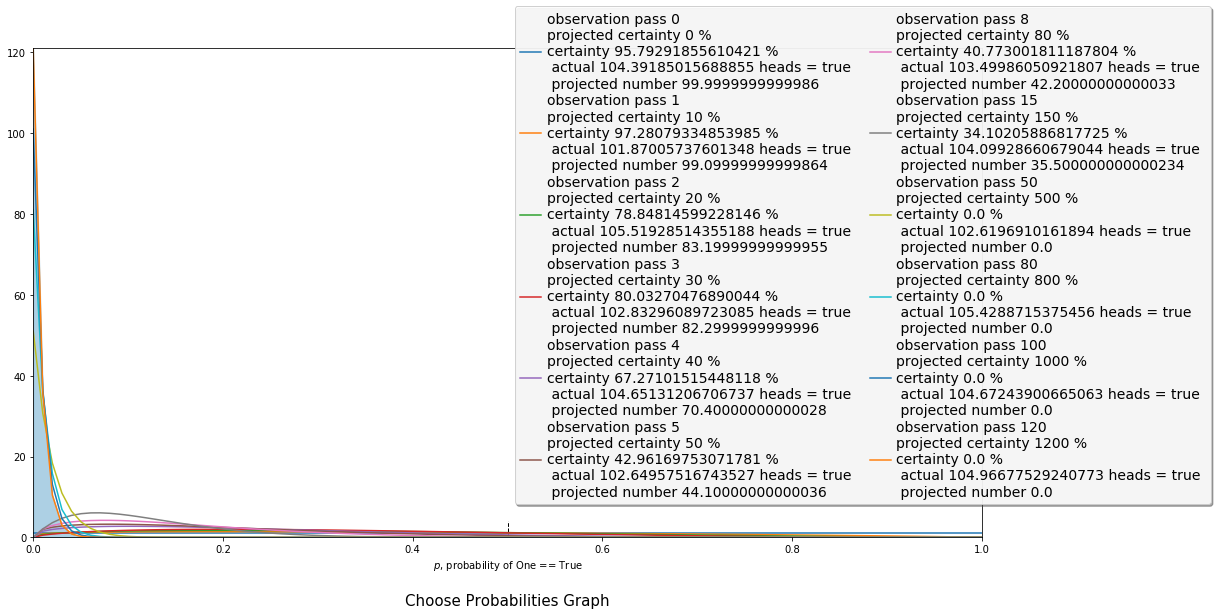

In [33]:
# chose_loop
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(17, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 80, 100, 120]
# n_trials = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

x = np.linspace(0, 1, 100)

# 
    # set up the data
plt.xlabel("$p$, probability of One == True") \
    if k in [0, len(n_trials)-1] else None
# ==== lines + labels
labels = []
for k, N in enumerate(n_trials):
    result = choose_loop(p0, p, N/10, 1000)
    data = np.array(result[0])
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    # y = dist.pdf(x, result[1], result[2])
    plt.plot(x, y)
    labels.append("observation pass {0}\nprojected certainty {1} % \ncertainty {2} % \n actual {3} heads = true \n "
                         "projected number {4}".format(N, N*10, result[2]/result[1]*100, result[1], result[2]))
    # labels.append("pass {0} certainty {1} % \n actual {2} selection = correct \n "
    #                      "projected number {3}".format(N, N*10, result[1], result[2]))
    # sx = plt.plot(5, 2, k+1)
    # plt.setp(sx.get_yticklabels(), visible=True)

plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)


plt.title("Choose Probabilities Graph",
             y=-.15,
             fontsize=15)
plt.autoscale(tight=True)

leg = plt.legend(labels, ncol=2, loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.2,
           handletextpad=0.4, handlelength=1.5,
           fontsize=14,
           fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.9)

In [34]:
xs = {'a': 4, 'b': 3, 'c': 2, 'd': 1}
sorted(xs.items(), key=lambda x: x[0])


[('a', 4), ('b', 3), ('c', 2), ('d', 1)]

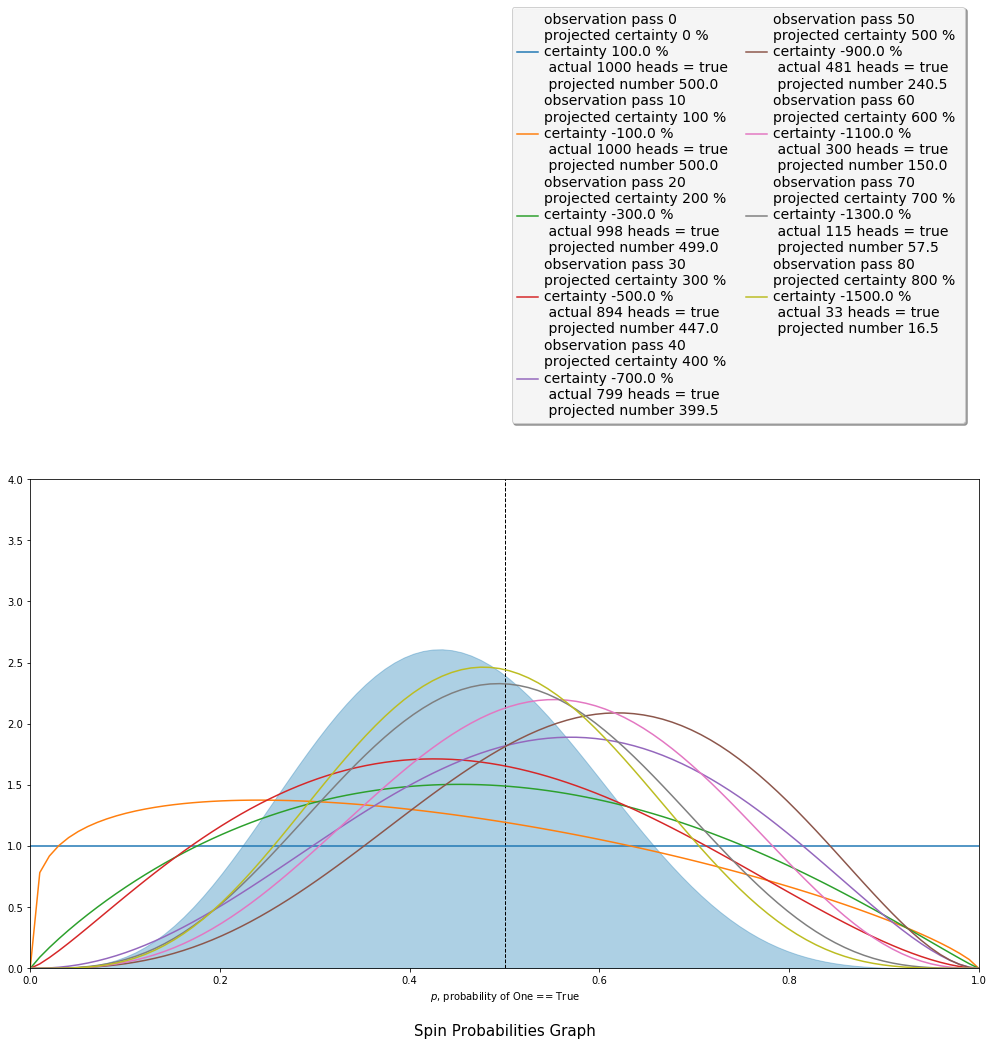

In [36]:
# spin_loop
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(17, 9)

import scipy.stats as stats

dist = stats.beta
# TypeError: slice indices must be integers or None or have an __index__ method
# n_trials = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1] 
n_trials = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

x = np.linspace(0, 1, 100)

# 
    # set up the data
plt.xlabel("$p$, probability of One == True") \
    if k in [0, len(n_trials)-1] else None
# ==== lines + labels
labels = []
a = 0
b = 0
c = 0
for k, N in enumerate(n_trials):
    result = spin_loop(p0, p, N/10, 1000, False)
    data = np.array(result[0])
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    if result[1] > 0:
        a = (result[2]/result[1])*100
    else:
        continue
    b = N*100
    c = ((a - b)/a) * 100
    # y = dist.pdf(x, c, result[1]) #result[1], result[2]
    plt.plot(x, y)
    labels.append("observation pass {0}\nprojected certainty {1} % \ncertainty {2} % \n actual {3} heads = true \n "
                         "projected number {4}".format(N*10, N*100, c, result[1], result[2]))
    # labels.append("pass {0} certainty {1} % \n actual {2} selection = correct \n "
    #                      "projected number {3}".format(N, N*10, result[1], result[2]))
    # sx = plt.plot(5, 2, k+1)
    # plt.setp(sx.get_yticklabels(), visible=True)

plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)


plt.title("Spin Probabilities Graph",
             y=-.15,
             fontsize=15)
plt.autoscale(tight=True)

leg = plt.legend(labels, ncol=2, loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.2,
           handletextpad=0.4, handlelength=1.5,
           fontsize=14,
           fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.9)

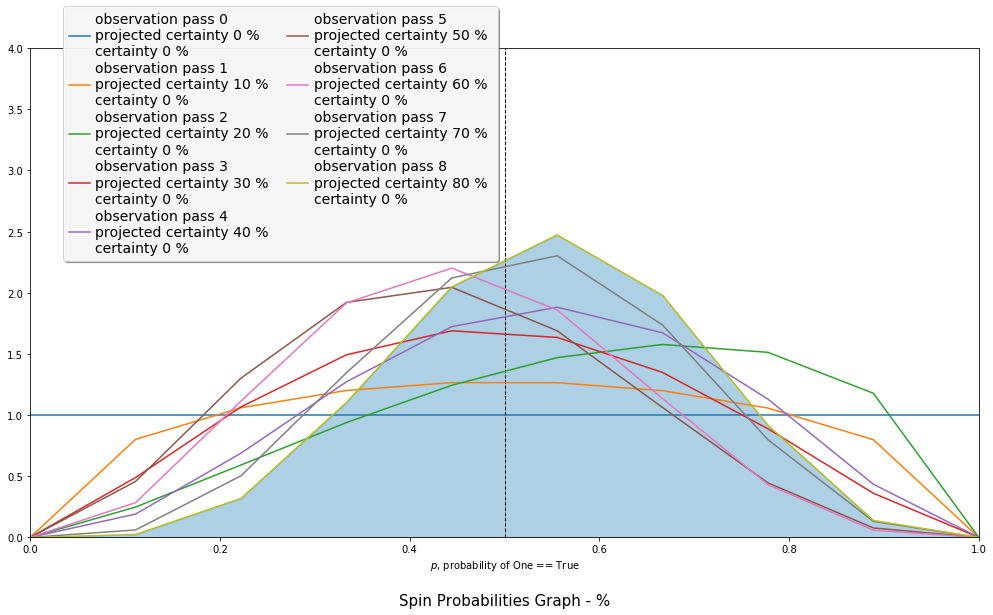

In [38]:
# spin_loop
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(17, 9)

import scipy.stats as stats

dist = stats.beta
# n_trials = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
n_trials = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

x = np.linspace(0, 1, 10)

# 
    # set up the data
plt.xlabel("$p$, probability of One == True") \
    if k in [0, len(n_trials)-1] else None
# ==== lines + labels
labels = []
a = 0
b = 0
c = 0
for k, N in enumerate(n_trials):
    result = spin_loop(p0, p, N/10, 1000,False)
    data = np.array(result[0])
    if result[1] > 0:
        a = (result[2]/result[1])*100
    else:
        continue
    b = N*100
    # c = ((a - b)/a) * 100
    # y = dist.pdf(x, N*100, c) #result[1], result[2]
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y)
    labels.append("observation pass {0}\nprojected certainty {1} % \ncertainty {2} % ".format(N, N*10, c))
    # labels.append("pass {0} certainty {1} % \n actual {2} selection = correct \n "
    #                      "projected number {3}".format(N, N*10, result[1], result[2]))
    # sx = plt.plot(5, 2, k+1)
    # plt.setp(sx.get_yticklabels(), visible=True)

plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)


plt.title("Spin Probabilities Graph - %",
             y=-.15,
             fontsize=15)
plt.autoscale(tight=True)

leg = plt.legend(labels, ncol=2, loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.2,
           handletextpad=0.4, handlelength=1.5,
           fontsize=14,
           fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.9)

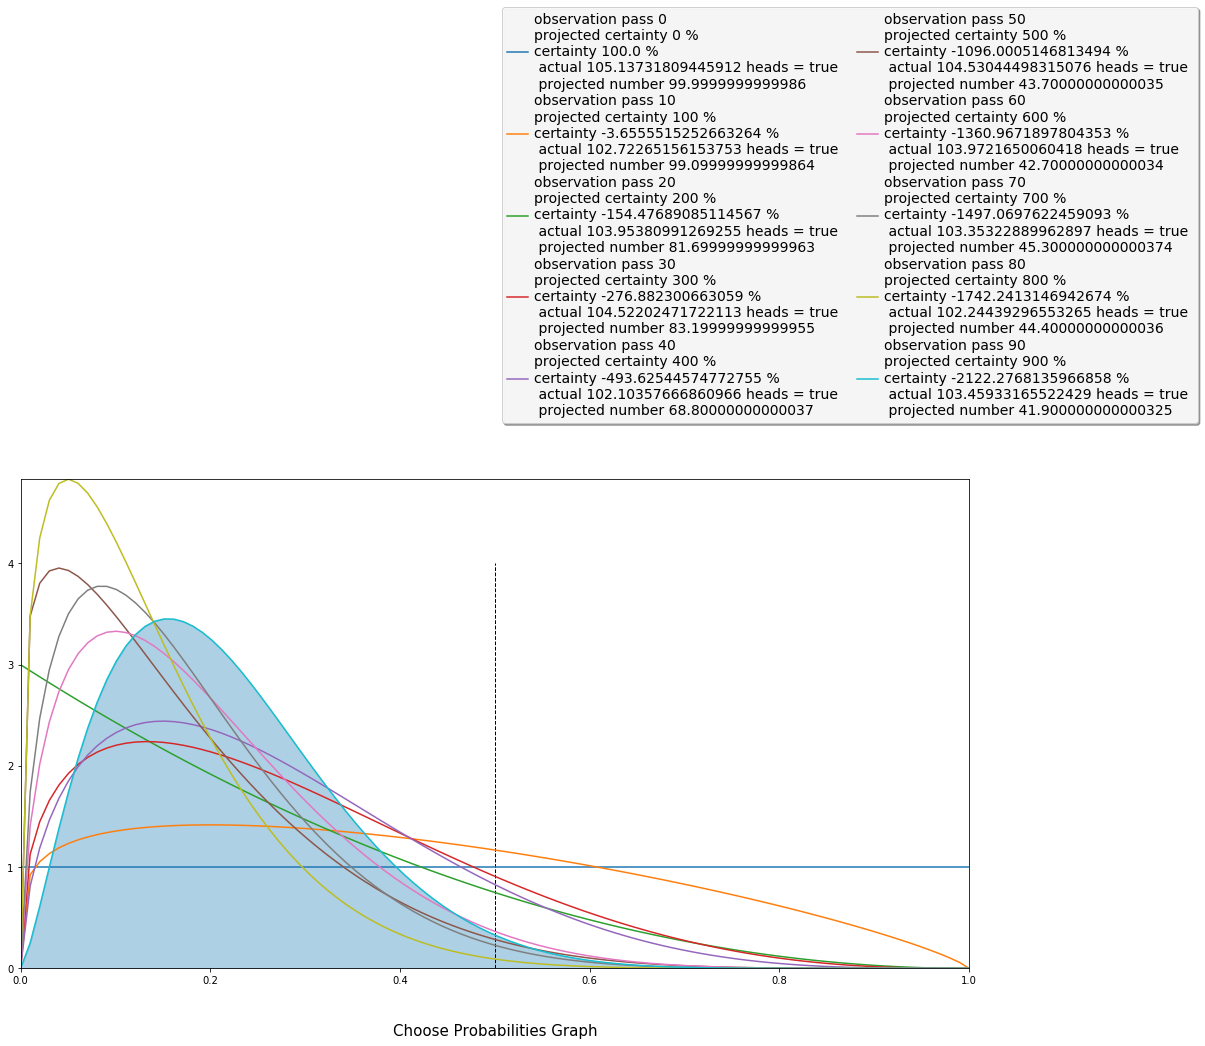

In [43]:
# choose_loop
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(17, 9)

import scipy.stats as stats

dist = stats.beta
# TypeError: slice indices must be integers or None or have an __index__ method
# n_trials = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
n_trials = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

x = np.linspace(0, 1, 100)

# 
    # set up the data
plt.xlabel("$p$, probability of One == True") \
    if k in [0, len(n_trials)-1] else None
# ==== lines + labels
labels = []
a = 0
b = 0
c = 0
for k, N in enumerate(n_trials):
    result = choose_loop(p0, p, N/10, 1000)
    data = np.array(result[0])
    a = result[2]/result[1]*100
    b = N*100
    c = ((a - b)/a) * 100
    # y = dist.pdf(x, c, result[1]) #result[1], result[2]
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y)
    labels.append("observation pass {0}\nprojected certainty {1} % \ncertainty {2} % \n actual {3} heads = true \n "
                         "projected number {4}".format(N*10, N*100, c, result[1], result[2]))
    # labels.append("pass {0} certainty {1} % \n actual {2} selection = correct \n "
    #                      "projected number {3}".format(N, N*10, result[1], result[2]))
    # sx = plt.plot(5, 2, k+1)
    # plt.setp(sx.get_yticklabels(), visible=True)

plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)


plt.title("Choose Probabilities Graph",
             y=-.15,
             fontsize=15)
plt.autoscale(tight=True)

leg = plt.legend(labels, ncol=2, loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.2,
           handletextpad=0.4, handlelength=1.5,
           fontsize=14,
           fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.9)

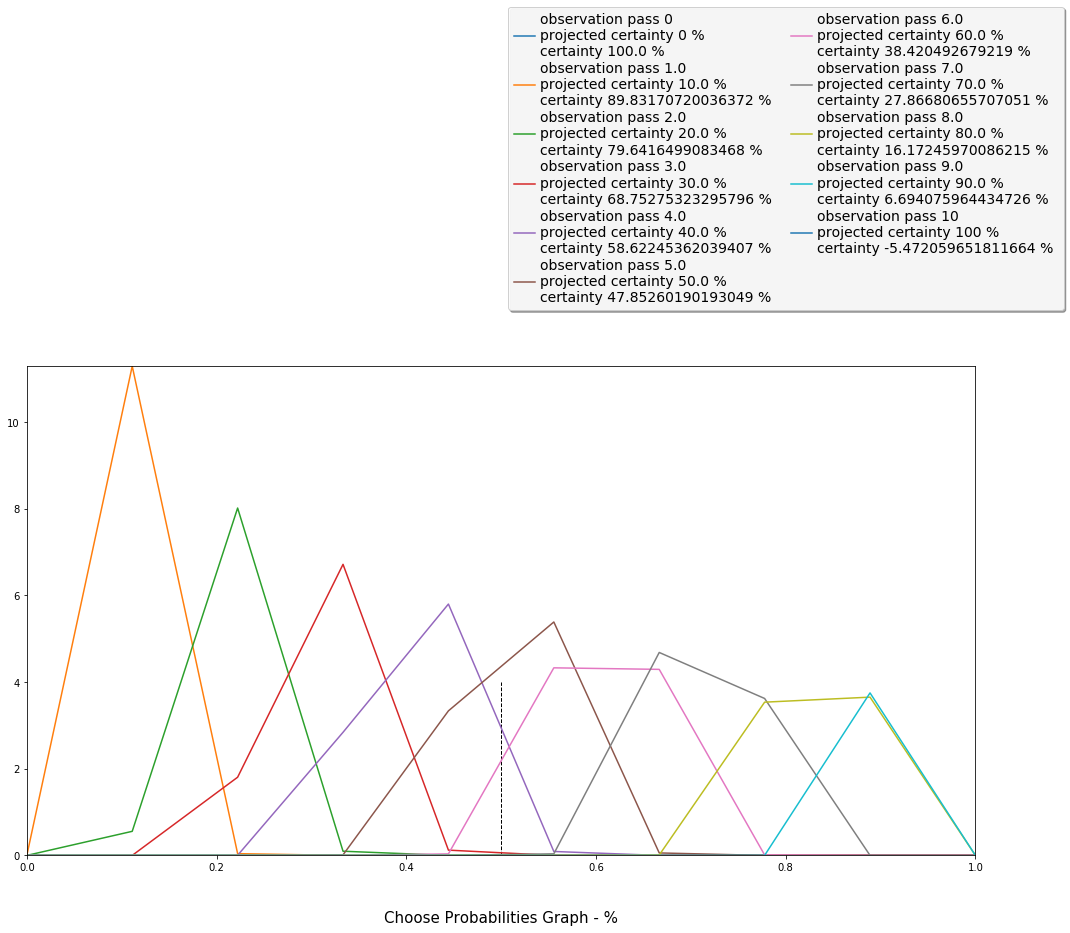

In [45]:
# choose_loop
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(17, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
# n_trials = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

x = np.linspace(0, 1, 10)

# 
    # set up the data
plt.xlabel("$p$, probability of One == True") \
    if k in [0, len(n_trials)-1] else None
# ==== lines + labels
labels = []
a = 0
b = 0
c = 0
for k, N in enumerate(n_trials):
    result = choose_loop(p0, p, N/10, 1000)
    data = np.array(result[0])
    a = result[2]/result[1]*100
    b = N*100
    c = ((a - b)/a) * 100
    y = dist.pdf(x, N*100, c) #result[1], result[2]
    plt.plot(x, y)
    labels.append("observation pass {0}\nprojected certainty {1} % \ncertainty {2} % ".format(N*10, N*100, c))
    # labels.append("pass {0} certainty {1} % \n actual {2} selection = correct \n "
    #                      "projected number {3}".format(N, N*10, result[1], result[2]))
    # sx = plt.plot(5, 2, k+1)
    # plt.setp(sx.get_yticklabels(), visible=True)

plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)


plt.title("Choose Probabilities Graph - %",
             y=-.15,
             fontsize=15)
plt.autoscale(tight=True)

leg = plt.legend(labels, ncol=2, loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.2,
           handletextpad=0.4, handlelength=1.5,
           fontsize=14,
           fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.9)

In [103]:
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 80, 100, 120]
for k, N in enumerate(n_trials):
    print(k)

0
1
2
3
4
5
6
7
8
9
10
11


In [104]:
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 80, 100, 120]
for k, N in enumerate(n_trials):
    print(N)

0
1
2
3
4
5
8
15
50
80
100
120


In [144]:
import talon
from talon import quotations

talon.init()

text =  """Reply

-----Original Message-----

Quote"""

reply = quotations.extract_from(text, 'text/plain')
reply = quotations.extract_from_plain(text)

/Users/adamsaltiel/miniconda3/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [145]:
reply

'Reply'